In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper',font_scale=1.5)

In [2]:
def var_filter(fisher,lcdm,neff_fixed):
    df=fisher.copy()
    if lcdm:
        df=df.drop('w0',axis=0)
        df=df.drop('w0',axis=1)
        df=df.drop('wa',axis=0)
        df=df.drop('wa',axis=1)
    if neff_fixed:
        df=df.drop('N_eff',axis=0)
        df=df.drop('N_eff',axis=1)

    return df

# $N_\mathrm{eff}$ fixed

In [3]:
CMB_fixed=var_filter(pd.read_excel('../data/CMB/all.xlsx',header=0,index_col=0),lcdm=True,neff_fixed=True)
cmb_cov_fixed=pd.DataFrame(np.linalg.inv(CMB_fixed.values),index=CMB_fixed.index,columns=CMB_fixed.columns)
cmb_cov_marg_fixed=cmb_cov_fixed.drop('tau',axis=0)
cmb_cov_marg_fixed=cmb_cov_marg_fixed.drop('tau',axis=1)
CMB_fixed=pd.DataFrame(np.linalg.inv(cmb_cov_marg_fixed.values),index=cmb_cov_marg_fixed.index,columns=cmb_cov_marg_fixed.columns)
ELG_fixed=var_filter(pd.read_excel('../data/ELG/fisher.xlsx',header=0,index_col=0),lcdm=True,neff_fixed=True)
LRG_fixed=var_filter(pd.read_excel('../data/LRG/fisher.xlsx',header=0,index_col=0),lcdm=True,neff_fixed=True)
QSO_fixed=var_filter(pd.read_excel('../data/QSO/fisher.xlsx',header=0,index_col=0),lcdm=True,neff_fixed=True)
PFS_fixed=var_filter(pd.read_excel('../data/PFS/fisher.xlsx',header=0,index_col=0),lcdm=True,neff_fixed=True)
multitracer_fixed=var_filter(pd.read_excel('../data/jpas_all/valid.xlsx',header=0,index_col=0),lcdm=True,neff_fixed=True)
survey_only_fixed=pd.read_excel('../data/combined/pelg+jmul-lcdm-fixed.xlsx',header=0,index_col=0)
DESI_fixed=var_filter(pd.read_excel('../data/DESI_all/valid.xlsx',header=0,index_col=0),lcdm=True,neff_fixed=True)
best_fixed=pd.read_excel('../data/combined/cmb+pelg+jmul-lcdm-fixed.xlsx',header=0,index_col=0)
gold_fixed=pd.read_excel('../data/combined/cmb+dmul-lcdm-fixed.xlsx',header=0,index_col=0)

In [4]:
orders=[r'$h$',r'$\Omega_\mathrm{m,0}$',r'$\Omega_\mathrm{b,0}$',r'$\sigma_8$',r'$n_\mathrm{s}$',r'$\sum m_\nu\;[\mathrm{eV}]$',r'$N_\mathrm{eff}$']
names=['h','omega_m0','omega_b0','sigma_8','n_s','m_nu',]
fid=np.array([0.67,0.32,0.049,0.81,0.96,0.06])
err_fixed=[]
fishers_fixed=[CMB_fixed,ELG_fixed,LRG_fixed,QSO_fixed,PFS_fixed,multitracer_fixed,survey_only_fixed,DESI_fixed,best_fixed,gold_fixed]
for f in fishers_fixed:
    cov=pd.DataFrame(np.linalg.inv(f.values),index=f.index,columns=f.columns).iloc[:len(orders),:len(orders)]
    e=[]
    for i,index in enumerate(names):
        e.append(np.sqrt(cov.loc[index,index])/fid[i])
    err_fixed.append(np.array(e))
err_fixed=np.stack(err_fixed,axis=0)
err_fixed=np.concatenate([err_fixed,np.zeros(len(fishers_fixed)).reshape(-1,1)],axis=1)

# $N_\mathrm{eff}$ free

In [5]:
CMB_free=var_filter(pd.read_excel('../data/CMB/all.xlsx',header=0,index_col=0),lcdm=True,neff_fixed=False)
cmb_cov_free=pd.DataFrame(np.linalg.inv(CMB_free.values),index=CMB_free.index,columns=CMB_free.columns)
cmb_cov_marg_free=cmb_cov_free.drop('tau',axis=0)
cmb_cov_marg_free=cmb_cov_marg_free.drop('tau',axis=1)
CMB_free=pd.DataFrame(np.linalg.inv(cmb_cov_marg_free.values),index=cmb_cov_marg_free.index,columns=cmb_cov_marg_free.columns)
ELG_free=var_filter(pd.read_excel('../data/ELG/fisher.xlsx',header=0,index_col=0),lcdm=True,neff_fixed=False)
LRG_free=var_filter(pd.read_excel('../data/LRG/fisher.xlsx',header=0,index_col=0),lcdm=True,neff_fixed=False)
QSO_free=var_filter(pd.read_excel('../data/QSO/fisher.xlsx',header=0,index_col=0),lcdm=True,neff_fixed=False)
PFS_free=var_filter(pd.read_excel('../data/PFS/fisher.xlsx',header=0,index_col=0),lcdm=True,neff_fixed=False)
multitracer_free=var_filter(pd.read_excel('../data/jpas_all/valid.xlsx',header=0,index_col=0),lcdm=True,neff_fixed=False)
survey_only_free=pd.read_excel('../data/combined/pelg+jmul-lcdm-free.xlsx',header=0,index_col=0)
DESI_free=var_filter(pd.read_excel('../data/DESI_all/valid.xlsx',header=0,index_col=0),lcdm=True,neff_fixed=False)
best_free=pd.read_excel('../data/combined/cmb+pelg+jmul-lcdm-free.xlsx',header=0,index_col=0)
gold_free=pd.read_excel('../data/combined/cmb+dmul-lcdm-free.xlsx',header=0,index_col=0)

In [6]:
names=['h','omega_m0','omega_b0','sigma_8','n_s','m_nu','N_eff',]
fid=np.array([0.67,0.32,0.049,0.81,0.96,0.06,3.044])
err_free=[]
fishers_free=[CMB_free,ELG_free,LRG_free,QSO_free,PFS_free,multitracer_free,survey_only_free,DESI_free,best_free,gold_free]
for f in fishers_free:
    cov=pd.DataFrame(np.linalg.inv(f.values),index=f.index,columns=f.columns).iloc[:len(orders),:len(orders)]
    e=[]
    for i,index in enumerate(names):
        e.append(np.sqrt(cov.loc[index,index])/fid[i])
    err_free.append(np.array(e))
err_free=np.stack(err_free,axis=0)

In [7]:
err_diff=err_free-err_fixed

In [8]:
palette=sns.color_palette(['plum','deepskyblue','mediumseagreen','orange','peru','salmon','yellowgreen','paleturquoise','darkgray','gold'])
palette

[(0.8666666666666667, 0.6274509803921569, 0.8666666666666667),
 (0.0, 0.7490196078431373, 1.0),
 (0.23529411764705882, 0.7019607843137254, 0.44313725490196076),
 (1.0, 0.6470588235294118, 0.0),
 (0.803921568627451, 0.5215686274509804, 0.24705882352941178),
 (0.9803921568627451, 0.5019607843137255, 0.4470588235294118),
 (0.6039215686274509, 0.803921568627451, 0.19607843137254902),
 (0.6862745098039216, 0.9333333333333333, 0.9333333333333333),
 (0.6627450980392157, 0.6627450980392157, 0.6627450980392157),
 (1.0, 0.8431372549019608, 0.0)]

Text(0.15, 0.55, '$\\Lambda\\mathrm{CDM}+\\sum m_\\nu+N_\\mathrm{eff}$')

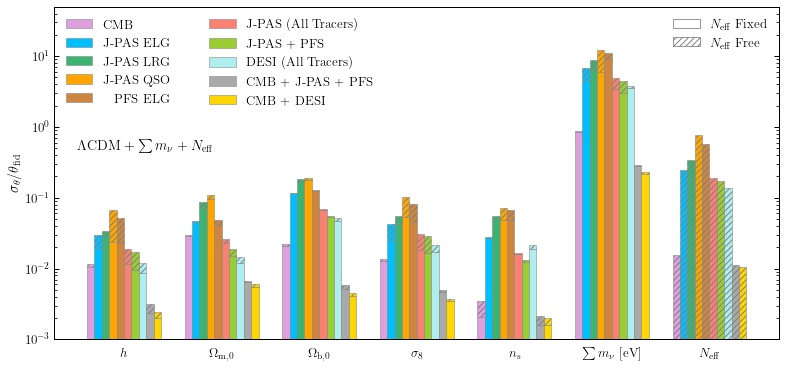

In [9]:
sns.set_palette(palette)
labels=['CMB','J-PAS ELG','J-PAS LRG','J-PAS QSO','PFS ELG','J-PAS (All Tracers)','J-PAS + PFS','DESI (All Tracers)','CMB + J-PAS + PFS','CMB + DESI']
position=np.arange(0,1.1*len(orders),1.1)
width=1/(len(fishers_free)+2)
offset=np.arange(-width/2*(len(fishers_free)-1),width/2*(len(fishers_free)-1)+width,width)
fig,ax=plt.subplots()
fig.set_size_inches((13,6))
fig.set_dpi(72)
for i,o in enumerate(offset):
    ax.bar(position+o,err_fixed[i],width,linewidth=0.5,edgecolor='gray',label=labels[i])
for i,o in enumerate(offset):
    ax.bar(position+o,err_diff[i],width,bottom=err_fixed[i],linewidth=0.5,edgecolor='gray',hatch='////')
ax.set_xticks(position,orders)
ax.set_yscale('log')
ax.tick_params(axis='y',which='both',direction='in',right=True)
ax.tick_params(bottom=False)
ax.set_ylabel(r'$\sigma_\theta/\theta_\mathrm{fid}$')
ax.set_ylim(1e-3,5e1)
legend=ax.legend(loc='upper left',frameon=False,ncol=2,columnspacing=3)
legend.get_texts()[4].set_position((11.5,0))
ax.add_artist(legend)
from matplotlib.patches import Patch
p1=Patch(facecolor='none',edgecolor='gray',label=r'$N_\mathrm{eff}$ Fixed')
p2=Patch(facecolor='none',edgecolor='gray',hatch='////',label=r'$N_\mathrm{eff}$ Free')
ax.legend(handles=[p1,p2],loc='upper right',frameon=False)
fig.text(0.15,0.55,r'$\Lambda\mathrm{CDM}+\sum m_\nu+N_\mathrm{eff}$')

Text(0.15, 0.55, '$\\Lambda\\mathrm{CDM}+\\sum m_\\nu+N_\\mathrm{eff}$')

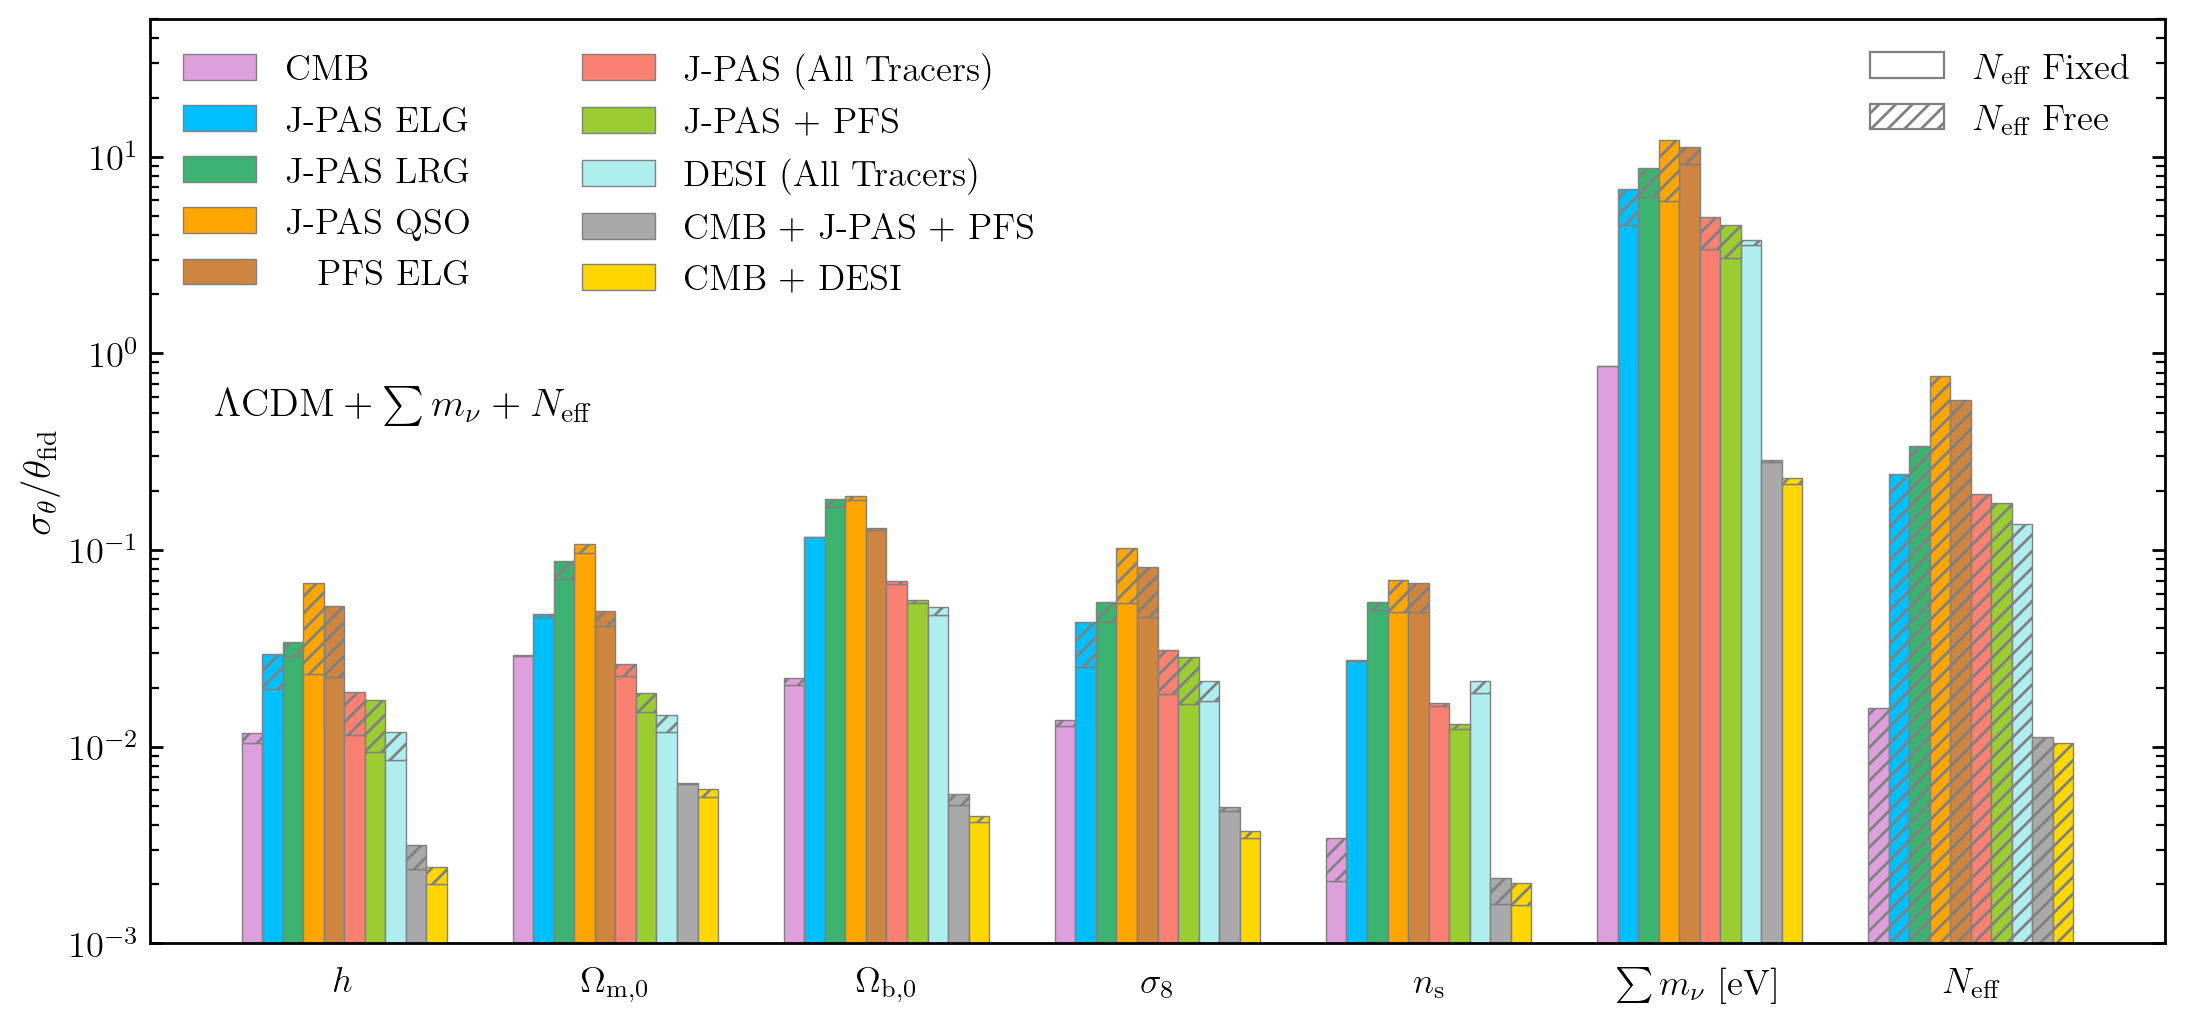

In [10]:
sns.set_palette(palette)
labels=['CMB','J-PAS ELG','J-PAS LRG','J-PAS QSO','PFS ELG','J-PAS (All Tracers)','J-PAS + PFS','DESI (All Tracers)','CMB + J-PAS + PFS','CMB + DESI']
position=np.arange(0,1.1*len(orders),1.1)
width=1/(len(fishers_free)+2)
offset=np.arange(-width/2*(len(fishers_free)-1),width/2*(len(fishers_free)-1)+width,width)
f,ax=plt.subplots()
f.set_size_inches((13,6))
f.set_dpi(200)
for i,o in enumerate(offset):
    ax.bar(position+o,err_fixed[i],width,linewidth=0.5,edgecolor='gray',label=labels[i])
for i,o in enumerate(offset):
    ax.bar(position+o,err_diff[i],width,bottom=err_fixed[i],linewidth=0.5,edgecolor='gray',hatch='////')
ax.set_xticks(position,orders)
ax.set_yscale('log')
ax.tick_params(axis='y',which='both',direction='in',right=True)
ax.tick_params(bottom=False)
ax.set_ylabel(r'$\sigma_\theta/\theta_\mathrm{fid}$')
ax.set_ylim(1e-3,5e1)
legend=ax.legend(loc='upper left',frameon=False,ncol=2,columnspacing=3)
legend.get_texts()[4].set_position((32,0))
ax.add_artist(legend)
from matplotlib.patches import Patch
p1=Patch(facecolor='none',edgecolor='gray',label=r'$N_\mathrm{eff}$ Fixed')
p2=Patch(facecolor='none',edgecolor='gray',hatch='////',label=r'$N_\mathrm{eff}$ Free')
ax.legend(handles=[p1,p2],loc='upper right',frameon=False)
f.text(0.15,0.55,r'$\Lambda\mathrm{CDM}+\sum m_\nu+N_\mathrm{eff}$')

In [10]:
fig.savefig('../fig/bar-lcdm-free.pdf',bbox_inches='tight')